# SVM

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from yellowbrick.contrib.classifier import DecisionViz

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
### Datasets:

df = pd.read_csv('../occupancy_data/training_preprocessed.csv')
df_test = pd.read_csv('../occupancy_data/test_preprocessed.csv')

df = df.drop('Unnamed: 0', 1)
df_test = df_test.drop('Unnamed: 0', 1)

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
#standardising the data:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Linear SVM

In [5]:
from sklearn.svm import LinearSVC

In [12]:
parameters = { 
               'C': np.arange(0.5, 5.5, 0.5)
             }

In [61]:
svm_1 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 3)

In [62]:
svm_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [63]:
svm_1.best_estimator_

LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [64]:
svm_1.fit(X_train_scaled, y_train)
y_pred = svm_1.predict(X_test_scaled)

In [65]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [66]:
svm_2 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 5)

In [67]:
svm_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
svm_2.best_estimator_

LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [69]:
svm_2.fit(X_train_scaled, y_train)
y_pred = svm_2.predict(X_test_scaled)

In [70]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [71]:
svm_3 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 10)

In [72]:
svm_3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [73]:
svm_3.best_estimator_

LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [74]:
svm_3.fit(X_train_scaled, y_train)
y_pred = svm_3.predict(X_test_scaled)

In [75]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [76]:
svm_4 = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 20)

In [77]:
svm_4.fit(X_train_scaled, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [78]:
svm_4.best_estimator_

LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [79]:
svm_4.fit(X_train_scaled, y_train)
y_pred = svm_4.predict(X_test_scaled)

In [80]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



## Linear SVM on PCA'd dataset

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(2)

In [8]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [9]:
X_test_pca = pca.transform(X_test_scaled)

In [10]:
X_test_pca

array([[ 3.35315812, -1.22072275],
       [ 3.33374889, -1.237873  ],
       [ 3.25960377, -1.24225344],
       ...,
       [ 3.07200402,  0.36112278],
       [ 3.18172561,  0.48366931],
       [ 3.31571882,  0.67921576]])

In [44]:
svm = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 5)

In [45]:
svm.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
svm.best_estimator_

LinearSVC(C=2.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [48]:
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

In [49]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9559769725702675
F1-score [0.97189797 0.8984375 ]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.94      5906
weighted avg       0.96      0.96      0.96      5906



In [54]:
decision_function = svm.decision_function(X_train_pca)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_pca[support_vector_indices]

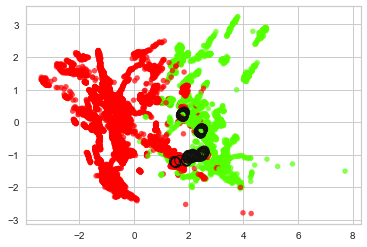

In [55]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors[:100, 0], support_vectors[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


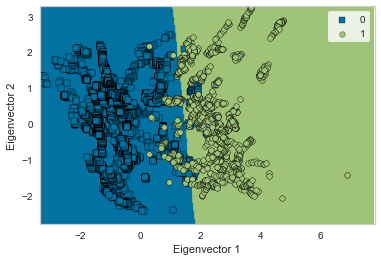

In [95]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

In [13]:
svm = GridSearchCV (estimator = LinearSVC(dual=False), param_grid = parameters, cv = 20)

In [14]:
svm.fit(X_train_pca, y_train)

GridSearchCV(cv=20, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
svm.best_estimator_

LinearSVC(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [16]:
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

In [17]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9559769725702675
F1-score [0.97189797 0.8984375 ]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.94      5906
weighted avg       0.96      0.96      0.96      5906



In [18]:
decision_function = svm.decision_function(X_train_pca)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_pca[support_vector_indices]

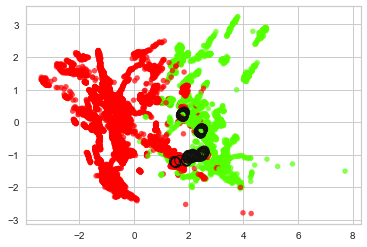

In [19]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors[:100, 0], support_vectors[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


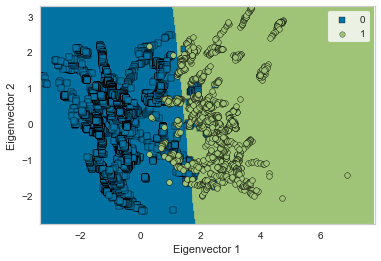

In [20]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Support vectors of previous SVM classifiers:

In [82]:
decision_function = svm_1.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [83]:
support_vectors_pca = pca.transform(support_vectors)

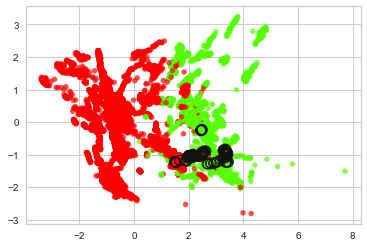

In [84]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [85]:
decision_function = svm_2.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [86]:
support_vectors_pca = pca.transform(support_vectors)

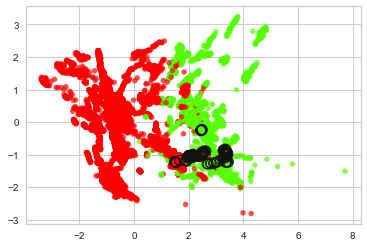

In [87]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [88]:
decision_function = svm_3.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [89]:
support_vectors_pca = pca.transform(support_vectors)

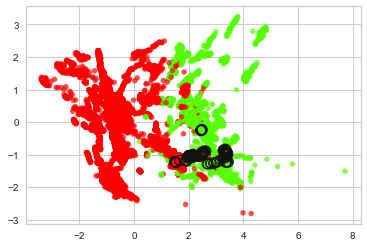

In [90]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [91]:
decision_function = svm_4.decision_function(X_train_scaled)
support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0]
support_vectors = X_train_scaled[support_vector_indices]

In [92]:
support_vectors_pca = pca.transform(support_vectors)

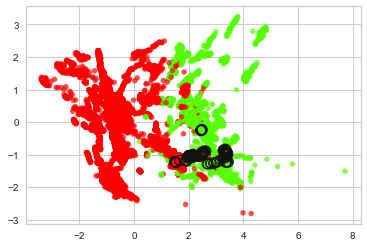

In [93]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## Non-linear SVM

In [10]:
from sklearn.svm import SVC
from scipy.stats import expon

In [11]:
parameters = {'C': expon(scale=100),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(1,6),
              'gamma': expon(scale=.1),
             }

Randomized search with:
- 3-fold cross-validation
- n_iter = 10

In [13]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 10)

In [14]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1bac3518>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19b877f0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [15]:
y_pred = svm.predict(X_test_scaled)

In [16]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [17]:
support_vectors = svm.best_estimator_.support_vectors_

In [18]:
support_vectors_pca = pca.transform(support_vectors)

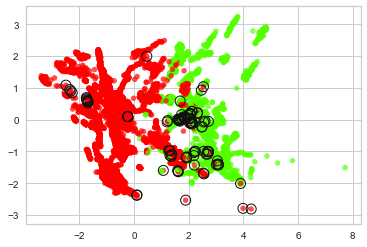

In [19]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [20]:
svm = svm.best_estimator_

In [21]:
svm.fit(X_train_pca, y_train)

SVC(C=32.97582166108744, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2,
    gamma=0.004650008575684211, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
y_pred = svm.predict(X_test_pca)

In [23]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9554690145614629
F1-score [0.97155219 0.89754577]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


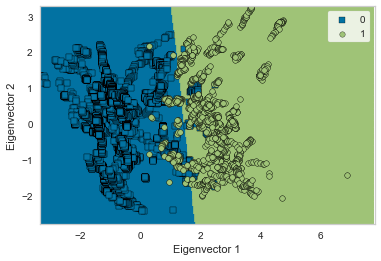

In [24]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 3-fold cross-validation
- n_iter = 30

In [25]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 30)

In [26]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1bac3518>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19b877f0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [27]:
y_pred = svm.predict(X_test_scaled)

In [28]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [29]:
support_vectors = svm.best_estimator_.support_vectors_

In [30]:
support_vectors_pca = pca.transform(support_vectors)

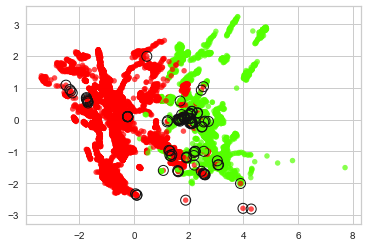

In [31]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [32]:
svm = svm.best_estimator_

In [33]:
svm.fit(X_train_pca, y_train)

SVC(C=74.9510384596558, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.00032123529409211265, kernel='rbf', max_iter=-1, probability=False,
    random_state=1, shrinking=True, tol=0.001, verbose=False)

In [34]:
y_pred = svm.predict(X_test_pca)

In [35]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9554690145614629
F1-score [0.97155219 0.89754577]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


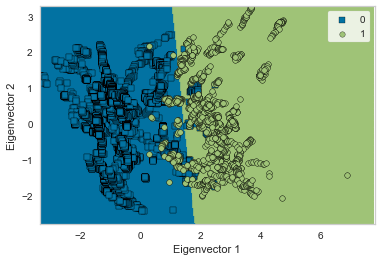

In [36]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 3-fold cross-validation
- n_iter = 70

In [37]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 70)

In [38]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1bac3518>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19b877f0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [39]:
y_pred = svm.predict(X_test_scaled)

In [40]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9917033525228581
F1-score [0.99465707 0.98144642]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [41]:
support_vectors = svm.best_estimator_.support_vectors_

In [42]:
support_vectors_pca = pca.transform(support_vectors)

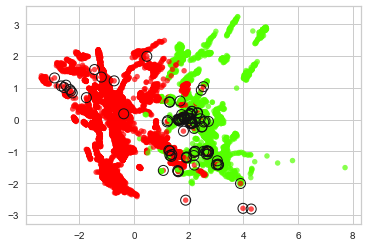

In [43]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [44]:
svm = svm.best_estimator_

In [45]:
svm.fit(X_train_pca, y_train)

SVC(C=23.514310327314643, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.012659788738871837, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
y_pred = svm.predict(X_test_pca)

In [47]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9569928885878768
F1-score [0.97254648 0.90078125]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.92      0.89      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.94      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


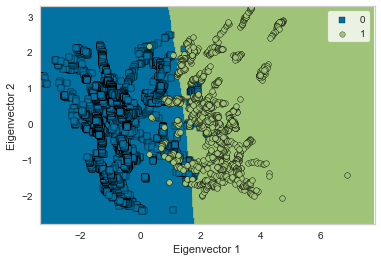

In [48]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 5-fold cross-validation
- n_iter = 70

In [49]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 5, n_iter = 70)

In [50]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1bac3518>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19b877f0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [51]:
y_pred = svm.predict(X_test_scaled)

In [52]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [53]:
support_vectors = svm.best_estimator_.support_vectors_

In [54]:
support_vectors_pca = pca.transform(support_vectors)

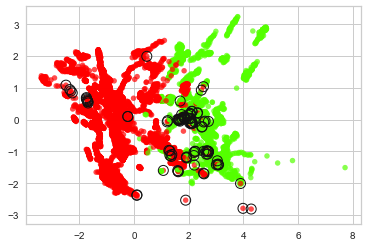

In [55]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [56]:
svm = svm.best_estimator_

In [57]:
svm.fit(X_train_pca, y_train)

SVC(C=156.40606490784745, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.0025830751869464867, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [58]:
y_pred = svm.predict(X_test_pca)

In [59]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9556383338977311
F1-score [0.97166342 0.89789556]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


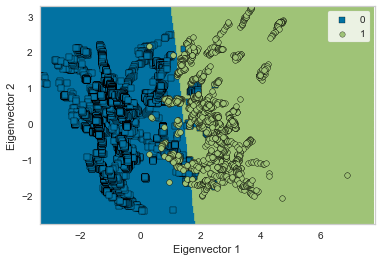

In [60]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 10-fold cross-validation
- n_iter = 70

In [61]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 10, n_iter = 70)

In [62]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1bac3518>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19b877f0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
    

In [63]:
y_pred = svm.predict(X_test_scaled)

In [64]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [65]:
support_vectors = svm.best_estimator_.support_vectors_

In [66]:
support_vectors_pca = pca.transform(support_vectors)

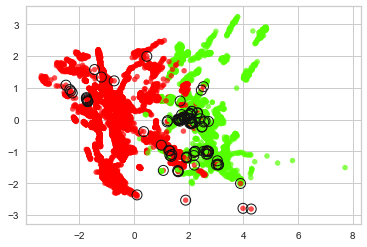

In [67]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [68]:
svm = svm.best_estimator_

In [69]:
svm.fit(X_train_pca, y_train)

SVC(C=195.23248065240114, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=4,
    gamma=0.004376049757584369, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [70]:
y_pred = svm.predict(X_test_pca)

In [71]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9558076532339993
F1-score [0.97178073 0.89816621]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


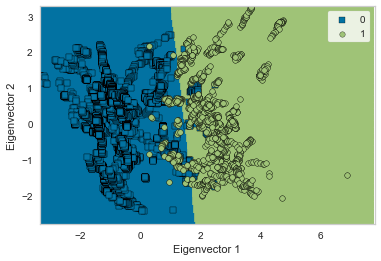

In [72]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Redoing cv= 5 with gamma != 1 (otherwise linear threshold chosen)

In [73]:
parameters = {'C': expon(scale=100),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,6),
              'gamma': expon(scale=.1)}

Randomized search with:
- 5-fold cross-validation
- n_iter = 70

In [74]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 5, n_iter = 70)

In [75]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c3c2935c0>,
                                        'degree': array([2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c3c2936a0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [76]:
y_pred = svm.predict(X_test_scaled)

In [77]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [78]:
support_vectors = svm.best_estimator_.support_vectors_

In [79]:
support_vectors_pca = pca.transform(support_vectors)

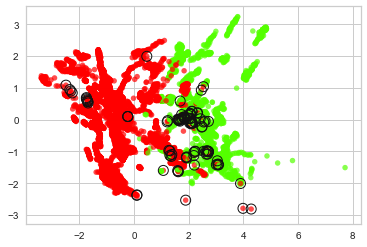

In [80]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [81]:
svm = svm.best_estimator_

In [82]:
svm.fit(X_train_pca, y_train)

SVC(C=17.002479960263646, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.007713683681102392, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [83]:
y_pred = svm.predict(X_test_pca)

In [84]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9554690145614629
F1-score [0.97155834 0.89746589]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


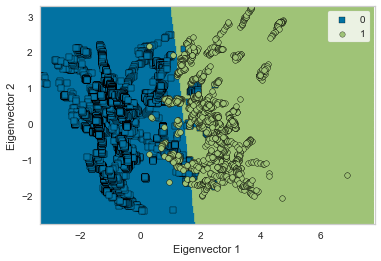

In [85]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

# --------------------------------------------------------------------------------------------

Can ignore what follows (was only modifying some of the parameters and not doing it the optimal way, anyway).
Or maybe use some of it for report.

In [39]:
parameters = {'C': np.arange(0.5, 5.5, 0.5),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(1,6)
             }

Grid search with 3-fold cross-validation:

In [42]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 3)

In [43]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
y_pred = svm.predict(X_test_scaled)

In [45]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [48]:
support_vectors = svm.best_estimator_.support_vectors_

In [55]:
support_vectors_pca = pca.transform(support_vectors)

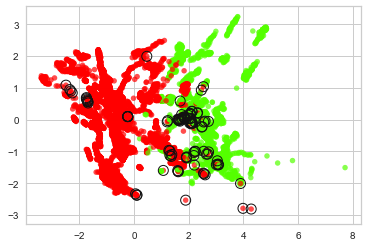

In [56]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [60]:
svm = svm.best_estimator_

In [63]:
svm.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [65]:
y_pred = svm.predict(X_test_pca)

In [66]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9654588554012868
F1-score [0.97783572 0.92177914]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4604
           1       0.92      0.92      0.92      1302

    accuracy                           0.97      5906
   macro avg       0.95      0.95      0.95      5906
weighted avg       0.97      0.97      0.97      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


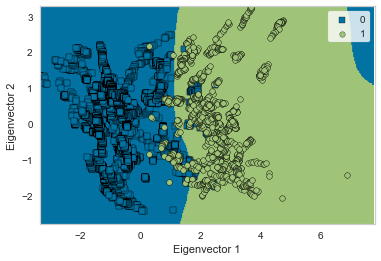

In [67]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 5-fold cross-validation:

In [68]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 5)

In [69]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
y_pred = svm.predict(X_test_scaled)

In [71]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [72]:
support_vectors = svm.best_estimator_.support_vectors_

In [73]:
support_vectors_pca = pca.transform(support_vectors)

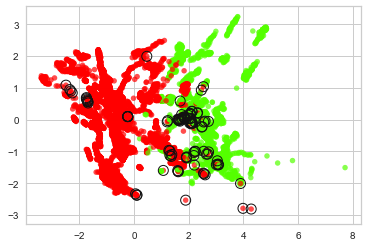

In [74]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [75]:
svm = svm.best_estimator_

In [76]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [77]:
y_pred = svm.predict(X_test_pca)

In [78]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9554690145614629
F1-score [0.97155219 0.89754577]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


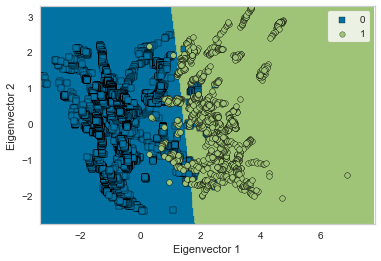

In [79]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 10-fold cross-validation:

In [80]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 10)

In [81]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
y_pred = svm.predict(X_test_scaled)

In [83]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9918726718591263
F1-score [0.99476554 0.98183195]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [84]:
support_vectors = svm.best_estimator_.support_vectors_

In [85]:
support_vectors_pca = pca.transform(support_vectors)

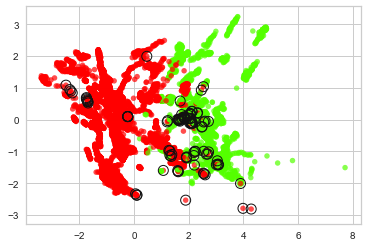

In [86]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [87]:
svm = svm.best_estimator_

In [88]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
y_pred = svm.predict(X_test_pca)

In [90]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9554690145614629
F1-score [0.97155219 0.89754577]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4604
           1       0.91      0.88      0.90      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.93      0.93      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


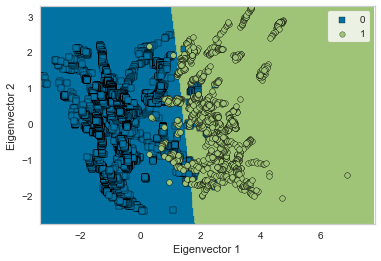

In [91]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

<b>Interestingly enough, with 5- and 10- fold cross validation the best results are yielded by a kernel function equivalent to a simple linear function (poly with degree=1). Will now rerun 5- and 10-fold cross-validation taking out the possibility of degree=1.</b>

Grid search with 5-fold cross-validation:

In [93]:
parameters = {'C': np.arange(0.5, 5.5, 0.5),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,6)
             }

In [94]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 5)

In [95]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
y_pred = svm.predict(X_test_scaled)

In [97]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9922113105316627
F1-score [0.99498255 0.98260212]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [98]:
support_vectors = svm.best_estimator_.support_vectors_

In [99]:
support_vectors_pca = pca.transform(support_vectors)

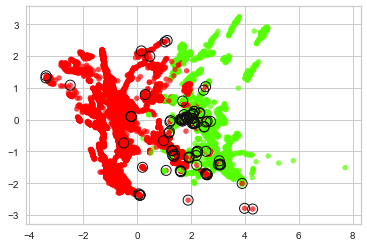

In [100]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [101]:
svm = svm.best_estimator_

In [102]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [103]:
y_pred = svm.predict(X_test_pca)

In [104]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9642736200474095
F1-score [0.97706272 0.9192499 ]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4604
           1       0.92      0.92      0.92      1302

    accuracy                           0.96      5906
   macro avg       0.95      0.95      0.95      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


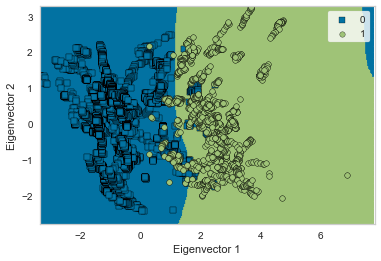

In [105]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 10-fold cross-validation:

In [106]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 10)

In [107]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [108]:
y_pred = svm.predict(X_test_scaled)

In [109]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9922113105316627
F1-score [0.99498255 0.98260212]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      1.00      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [110]:
support_vectors = svm.best_estimator_.support_vectors_

In [111]:
support_vectors_pca = pca.transform(support_vectors)

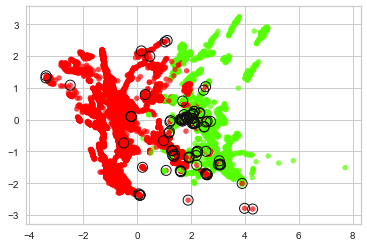

In [112]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [113]:
svm = svm.best_estimator_

In [114]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [115]:
y_pred = svm.predict(X_test_pca)

In [116]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9642736200474095
F1-score [0.97706272 0.9192499 ]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4604
           1       0.92      0.92      0.92      1302

    accuracy                           0.96      5906
   macro avg       0.95      0.95      0.95      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


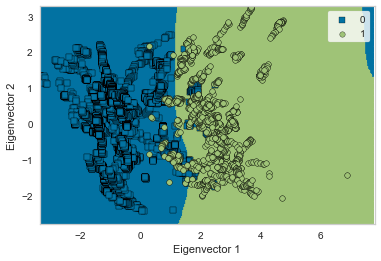

In [117]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()